In [1]:
from PIL import Image
from pylab import *
from PCV.localdescriptors import sift
from PCV.localdescriptors import harris
import cv2

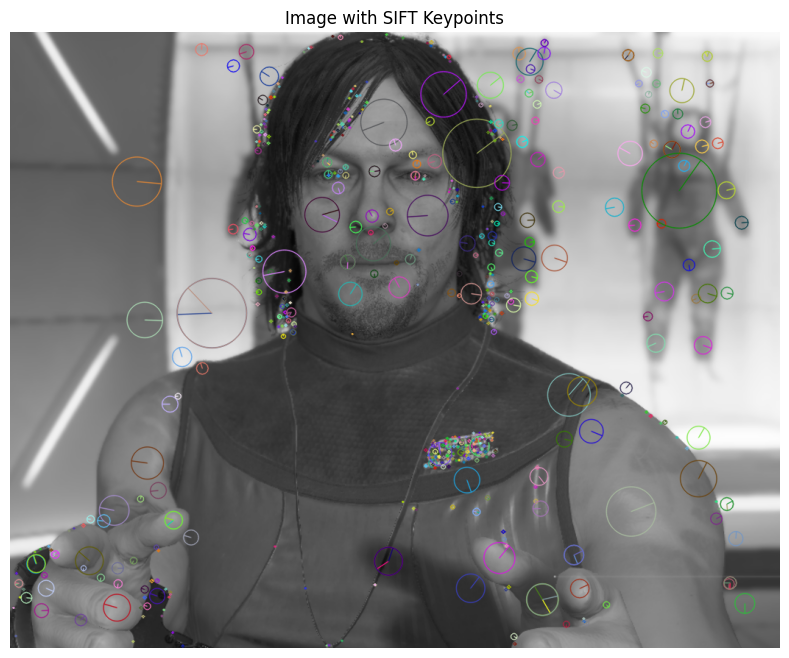

In [28]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取图像
image_path = "data/1.png"
image = cv2.imread(image_path)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# 创建SIFT对象并提取特征
sift = cv2.SIFT_create()
keypoints, descriptors = sift.detectAndCompute(gray_image, None)

# 在图像上绘制特征点
image_with_keypoints = cv2.drawKeypoints(gray_image, keypoints, image, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# 显示图像和特征点
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('Image with SIFT Keypoints')
plt.axis('off')
plt.show()


['data/1.png', 'data/12.png', 'data/5.png', 'data/11.png', 'data/6.png']


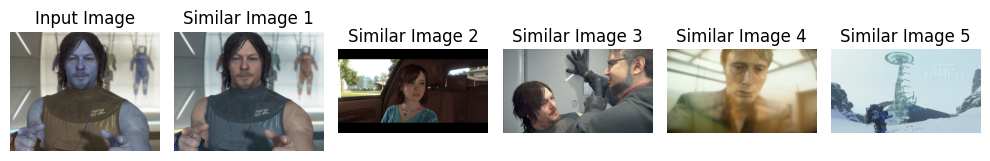

In [26]:
import cv2
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import os
import matplotlib.pyplot as plt

def extract_sift_features(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(img, None)
    return keypoints, descriptors

def image_retrieval(input_image, dataset_folder, top_n=5):
    input_keypoints, input_features = extract_sift_features(input_image)

    image_paths = os.listdir(dataset_folder)
    similarity_scores = []
    for image_path in image_paths:
        full_path = os.path.join(dataset_folder, image_path)
        image_keypoints, image_features = extract_sift_features(full_path)
        if image_features is not None and input_features is not None:
            similarity = cosine_similarity(input_features, image_features)
            if not np.isnan(similarity[0][0]):
                similarity_scores.append((full_path, similarity[0][0]))

    similarity_scores.sort(key=lambda x: x[1], reverse=True)
    similar_images = [path for path, _ in similarity_scores[:top_n]]
    return similar_images

def plot_images(input_image, similar_images):
    plt.figure(figsize=(10, 5))

    # Plot input image
    plt.subplot(1, len(similar_images) + 1, 1)
    plt.imshow(cv2.imread(input_image))
    plt.title("Input Image")
    plt.axis('off')

    # Plot similar images
    for i, image_path in enumerate(similar_images):
        plt.subplot(1, len(similar_images) + 1, i + 2)
        plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
        plt.title(f"Similar Image {i + 1}")
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# 示例用法
input_image = 'data/1.png'
dataset_folder = 'data/'
similar_images = image_retrieval(input_image, dataset_folder)
print(similar_images)
plot_images(input_image, similar_images)
